In [60]:
import pandas as pd

import hilbert
import numpy as np

from tqdm import trange, tqdm

import scipy.spatial as spatial

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [86]:
df = pd.read_csv('results/Japan_octect_3_time_100k_final.csv')
df_coords = hilbert.decode(df.integer.to_numpy(), num_bits=12, num_dims=2)
df['x'] = df_coords[:, 0]
df['y'] = df_coords[:, 1]
df['color'] = -1

In [87]:
threshold = df[df.lbf_label == 0].time.median()
threshold

92625.0

In [88]:
emperical_ft = df[(df.lbf_label != 0) & (df.time <= threshold)]

In [89]:
fts_indices = np.column_stack((emperical_ft['x'].to_numpy(), emperical_ft['y'].to_numpy()))

In [90]:
point_tree = spatial.cKDTree(fts_indices)
grid = np.zeros(fts_indices.shape[0])

color = 1
thresh = 100
for i in range(len(fts_indices)):
    if grid[i] != 0:
        continue
    nearest_indices = point_tree.query_ball_point(fts_indices[i], thresh)
    for j in nearest_indices:
        grid[j] = color
    color += 1

In [91]:
for i in range(len(grid)):
    x, y = fts_indices[i]
    index = df.index[(df.x == x) & (df.y == y)]
    assert len(index) >= 1, (x, y)

    for j in index:
        df.at[j, 'color'] = grid[i]
  

In [94]:
df[df.color != -1].internal_label.unique()

array(['FT'], dtype=object)

In [95]:
df.color.unique()

array([ -1,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  18,  17,  19,  20,  21,  76,  22,  23,  24,
        25, 246,  26,  27,  28,  29,  30, 155,  31,  32,  33, 214,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43, 269,  44,  45,  46,
        47,  48,  68,  51,  49,  50,  52, 255, 227, 135,  92,  53, 272,
        54,  55,  56,  57,  58,  59, 231,  60, 110,  61,  62,  63, 108,
       193, 251,  64,  65, 122,  66,  67,  70, 195, 210,  69,  97,  71,
       248,  72,  73,  74, 189,  75,  77, 186,  78,  79, 116, 215,  80,
        81,  82,  83, 160,  84,  85, 222,  86, 228,  87,  88,  89, 218,
       199, 229,  90,  91, 243, 257,  93,  94,  95,  96, 197,  98,  99,
       100, 101, 102, 103, 156, 104, 105, 106, 107, 153, 130, 109, 166,
       111, 146, 112, 235, 113, 114, 115, 117, 118, 119, 120, 121, 136,
       188, 123, 124, 125, 126, 127, 128, 244, 252, 129, 271, 131, 132,
       133, 134, 137, 138, 139, 140, 141, 209, 202, 142, 211, 22

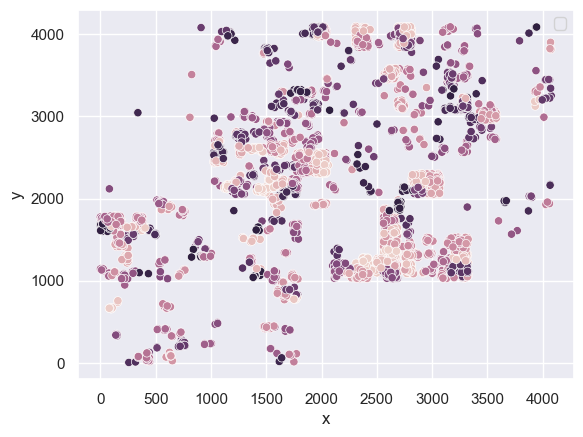

In [96]:
sns.scatterplot(
    data=df[df.color != -1],
    x='x',
    y='y',
    hue='color',
    legend='full',
    #palette="muted"
)
plt.legend([])

In [22]:
df.to_csv('Japan_colored_100k_final.csv', index=None)

## CREATE CONVEX HULL

In [98]:
hull_colors = df[df.color != -1]['color'].unique()

In [132]:
len(hull_colors)

278

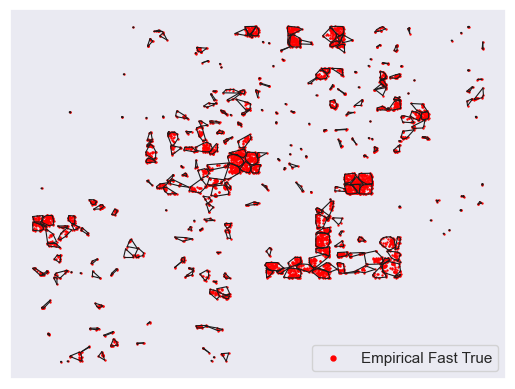

In [130]:
fig, ax = plt.subplots()

ax.scatter(df[df.color != -1]['x'], df[df.color != -1]['y'], color="red", s=0.5, label="Empirical Fast True")

for c in hull_colors:
    hull_points = df[['x', 'y']][df.color == c].to_numpy()
    if len(hull_points) <= 2:
        for point in hull_points:
            cir = plt.Circle(point, 5, color='k',fill=False, linewidth=0.8)
            ax.add_patch(cir)
    else:    
        hull = spatial.ConvexHull(hull_points)
    
        for simplex in hull.simplices:
            ax.plot(hull_points[simplex, 0], hull_points[simplex, 1], 'k-', linewidth=0.8)

ax.legend(markerscale=5)
plt.xticks([])
plt.yticks([])
plt.savefig('figures/Japan_100k_search.pdf', dpi=500, bbox_inches='tight')

In [54]:
hull_points = np.array([[1, 2], [3, 4]])

In [57]:
hull_points[:, 0].sum() // 2, hull_points[:, 1].sum() // 2

(2, 3)

In [104]:
df[df.lbf_label == 1]

,integer,time,lbf_label,internal_label,x,y,color
11,13353166,186708.0,1,FT,3192,1522,-1
30,8728231,284083.0,1,FT,2913,2114,-1
32,10740593,288750.0,1,FT,3157,3528,-1
33,10697692,366625.0,1,FT,3323,3493,-1
39,11296337,237667.0,1,ST,4060,3377,-1
...,...,...,...,...,...,...,...
99848,5941192,94875.0,1,ST,986,4066,-1
99882,5941127,102625.0,1,ST,982,4069,-1
99896,6587145,93625.0,1,ST,1165,3740,-1
99908,10987811,90917.0,1,FT,3339,3610,128


In [105]:
df[df.color != -1]

,integer,time,lbf_label,internal_label,x,y,color
336,14491908,92042.0,1,FT,2624,1362,1
377,8721983,92125.0,1,FT,2832,2167,2
397,8112227,92084.0,1,FT,1490,2139,3
431,14377328,91083.0,1,FT,2395,1223,4
454,8049818,92041.0,1,FT,1167,2155,5
...,...,...,...,...,...,...,...
99818,8770618,90292.0,1,FT,2939,2207,18
99828,8755412,90250.0,1,FT,3049,2215,76
99833,920391,89959.0,1,FT,722,201,219
99840,9838233,90625.0,1,FT,2373,3872,113


In [107]:
orig_df = pd.read_csv('data/Japan_dataset_octet_3.csv')

In [110]:
orif_df

,integer,label
0,65552,1
1,65553,1
2,65554,1
3,65555,1
4,65556,1
...,...,...
1893236,14187820,0
1893237,15423251,0
1893238,15193767,0
1893239,9174177,0


In [114]:
count = 0
for integer in df[df.color != -1].integer.to_numpy():
    total_length =len(orif_df[(orif_df.label == 1) & (orif_df.integer == integer)])
    if total_length == 0:
        continue
    elif total_length > 1:
        assert False, (integer, total_length)
    else:
        count += 1

In [117]:
count /4577

0.9139174131527201

In [113]:
len(orig_df[(orig_df.label == 1) & (orig_df.integer == -1)])

0

In [120]:
(count /  779054) * 100

0.5369332549476673

In [121]:
0.0143 * 100 

1.43

In [126]:
df[df.lbf_label == 1]['time'].median(), df[df.lbf_label == 0]['time'].median()

(90917.0, 92625.0)

In [128]:
df[df.internal_label == 'ST'].time.median(), df[df.internal_label == 'FT'].time.median(), df[df.internal_label == 'SF'].time.median()

(95167.0, 90791.0, 92625.0)